# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?
**Answer**
* Before constructing a model, it is essential to perform Explanatory Data Analysis (EDA) in order to understand data at hand.
* EDA help us to explore data to identify trends and hidden pattern, data anomalities, missing and duplicate values
* It also help us to check distribution of features to indetify outliers.
* It is also essential to check model assumptions
* Summary statistic

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?
**Answer**
* Pandas numpy and pandas are used to EDA analysis. To build  and evaluate model, modeules of Sklearn library has been used.
  
**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import numpy as np
import pandas as pd 

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt 
import seaborn as sns


# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics as metrics



Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")


<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


Purpose of EDA is to explore dataset before buulding a logistic regression model. Data is always messy. With EDA, we can  find out characteristics of dataset, trends and hidden patterns, distribution of chosen variables. EDA also inform us about duplicate and missing values. Moreover, using EDA we can check model assumptions and do feature engineering to tranform dataset for our need 


### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape


(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


In [8]:
# finding number of unique values in all columns
for column in data.columns:
    num_unique_val = data[column].nunique()
    print(f'Number of unique values in {column} is: {num_unique_val}')

Number of unique values in # is: 19382
Number of unique values in claim_status is: 2
Number of unique values in video_id is: 19382
Number of unique values in video_duration_sec is: 56
Number of unique values in video_transcription_text is: 19012
Number of unique values in verified_status is: 2
Number of unique values in author_ban_status is: 3
Number of unique values in video_view_count is: 15632
Number of unique values in video_like_count is: 12224
Number of unique values in video_share_count is: 9231
Number of unique values in video_download_count is: 4336
Number of unique values in video_comment_count is: 2424


Check for and handle missing values.

In [9]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

Display missing data

In [10]:
# create bolean mask 
mask = data.isna().any(axis=1)
# use bolean mask to display missing dataset
data[mask]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,NaN,4380513697,39,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,NaN,8352130892,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,NaN,4443076562,25,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,NaN,8328300333,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,NaN,3968729520,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


`verified_staus`, outcome variable, is missing for this rows. Replacing missing variables does not make sense. 

In [11]:
# Drop rows with missing values
data = data.dropna(axis=0)


In [12]:
data.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [13]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [14]:
# Check for duplicates
duplicate = data.duplicated()
data[duplicate].sum()

#                             0
claim_status                  0
video_id                      0
video_duration_sec            0
video_transcription_text      0
verified_status               0
author_ban_status             0
video_view_count            0.0
video_like_count            0.0
video_share_count           0.0
video_download_count        0.0
video_comment_count         0.0
dtype: object

Check for and handle outliers.

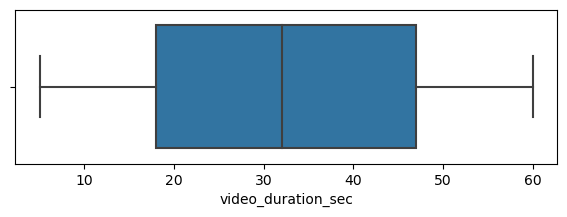

In [15]:
# Create a boxplot to visualize distribution of `video_duration_sec`
fig = plt.figure(figsize=(7,2))
sns.boxplot(x = data.video_duration_sec)
plt.show()


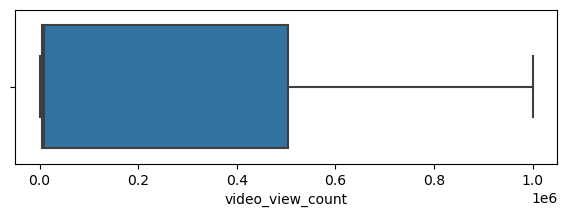

In [16]:
# Create a boxplot to visualize distribution of `video_view_count`
fig = plt.figure(figsize=(7,2))
sns.boxplot(x = data.video_view_count)
plt.show()


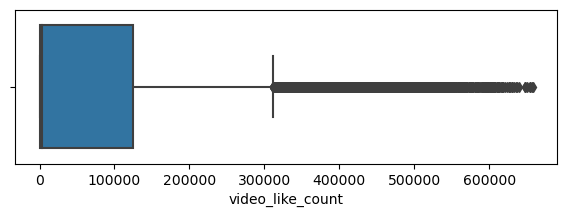

In [17]:
# Create a boxplot to visualize distribution of `video_like_count`
fig = plt.figure(figsize=(7,2))
sns.boxplot(x = data.video_like_count)
plt.show()


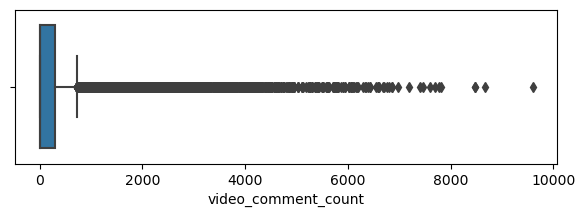

In [18]:
# Create a boxplot to visualize distribution of `video_comment_count`
fig = plt.figure(figsize=(7,2))
sns.boxplot(x = data.video_comment_count)
plt.show()


In [19]:
# Check for and handle outliers for video_like_count
def impute(columns, factor):
    """
    Impute upper limit values in specified colums based on their interquartile range

    Arguments:
        columns: list of columns to iterate over
        factor: number the represent magnitude that multiplied by iqr to determine upper threshold
    """
    for col in columns:
        #impute negative values with zero
        data.loc[data[col] < 0, col] = 0

        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
        upper_threshold = q3 + (factor*iqr)
        
        # impute upper threshold 
        data.loc[data[col] > upper_threshold, col] = upper_threshold
        print(data[col].describe())

* `video_like_count` and `video_comment_count` contains outliers. We defined function  to input upper threshold values (Q3 +(1.5*IQR)) for outliers 

In [20]:
impute(['video_like_count', 'video_comment_count'], 1.5)

count     19084.000000
mean      74323.538632
std      107103.555220
min           0.000000
25%         810.750000
50%        3403.500000
75%      125020.000000
max      311333.875000
Name: video_like_count, dtype: float64
count    19084.000000
mean       181.023501
std        272.084766
min          0.000000
25%          1.000000
50%          9.000000
75%        292.000000
max        728.500000
Name: video_comment_count, dtype: float64


Check class balance.

In [21]:
# Check class balance for video_comment_count
balance = data.groupby('verified_status').agg({'video_comment_count':['count'],
                                              'video_like_count': ['count']}).reset_index()
balance

,verified_status,video_comment_count,video_like_count
,,count,count
0,not verified,17884,17884
1,verified,1200,1200


In [22]:
data['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

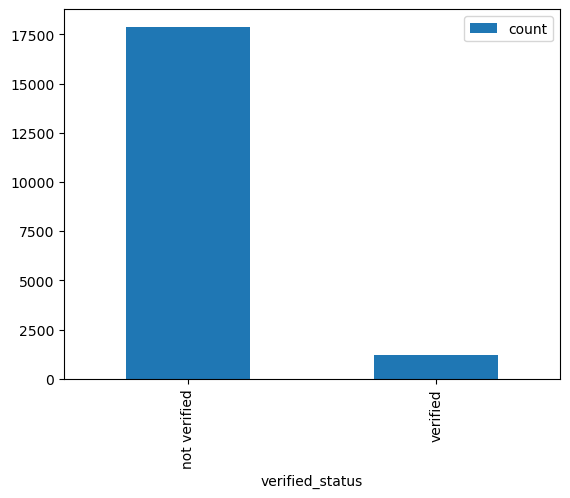

In [23]:
data['verified_status'].value_counts().plot(kind='bar')
plt.legend()

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [24]:
# Use resampling to create class balance in the outcome variable, if needed
# Identify data points from majority and minority classes
majority_class = data[data['verified_status'] == 'not verified']
minority_class = data[data['verified_status'] == 'verified']
# Upsample the minority class (which is "verified")
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=0)
# Combine majority class with upsampled minority class
balanced_data = pd.concat([majority_class, minority_upsampled]).reset_index(drop=True)

# Display new class counts
balanced_data['verified_status'].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Upsampling os a method to increase minority class. However, this create duplicate values 

<Axes: xlabel='verified_status'>

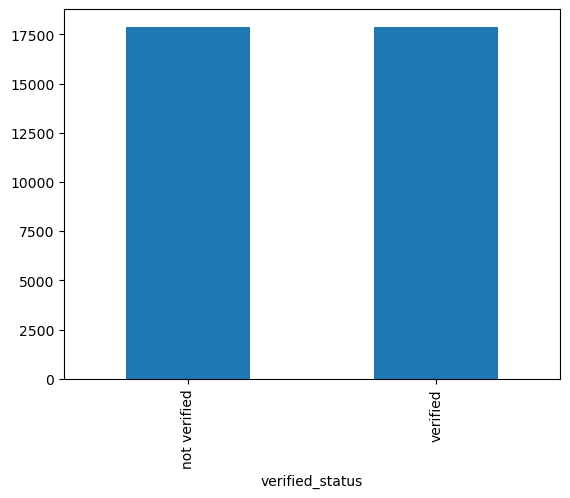

In [82]:
balanced_data['verified_status'].value_counts().plot(kind='bar')

In [83]:
balanced_data.shape

(35768, 13)

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [84]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
balanced_data[['verified_status','video_transcription_text']].groupby(by='verified_status')[['video_transcription_text']].agg(func=lambda x: np.mean([len(text) for text in x]))



,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [85]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
balanced_data['text_length'] = balanced_data['video_transcription_text'].apply(lambda x: len(x))
balanced_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

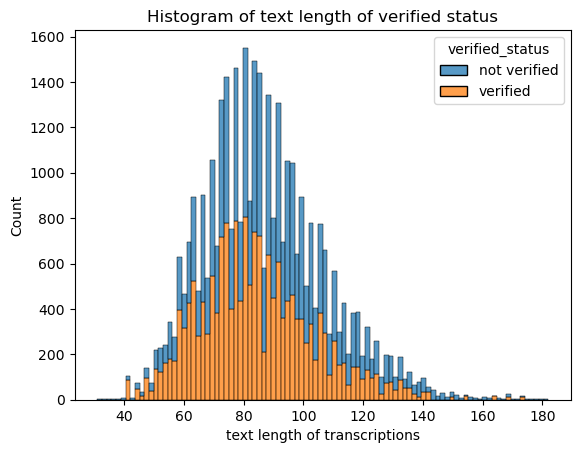

In [86]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot

sns.histplot(data=balanced_data, stat='count',multiple='stack', hue= 'verified_status', x='text_length')
plt.title('Histogram of text length of verified status')
plt.xlabel('text length of transcriptions')
plt.show()



### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [87]:
# Code a correlation matrix to help determine most correlated variables
corr_matrix = balanced_data.corr(numeric_only=True)


Visualize a correlation heatmap of the data.

<Axes: >

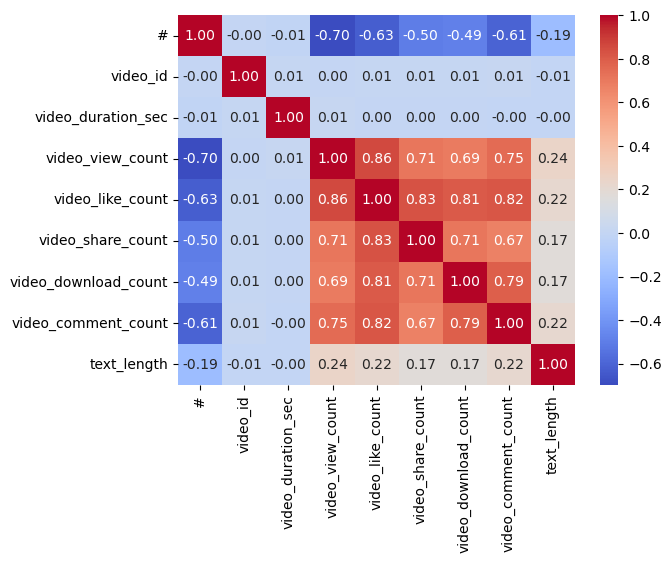

In [31]:
# Create a heatmap to visualize how correlated variables are
sns.heatmap(corr_matrix, annot=True, fmt = '.2f', cmap='coolwarm')

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

the highest correlation coefficient is 0.86 between `video_view_count` and `video_like_count`. We can exclude `video_like_count` from the model.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [32]:
# Select outcome variable
y = balanced_data['verified_status']
y


0        not verified
1        not verified
2        not verified
3        not verified
4        not verified
             ...     
35763        verified
35764        verified
35765        verified
35766        verified
35767        verified
Name: verified_status, Length: 35768, dtype: object

Select the features.

In [33]:
# Select features

# Display first few rows of features dataframe
X = balanced_data[['claim_status', 'video_duration_sec', 'author_ban_status', 'video_view_count', 'video_share_count', 'video_download_count', 'video_comment_count']]
X.head()

,claim_status,video_duration_sec,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,claim,59,under review,343296.0,241.0,1.0,0.0
1,claim,32,active,140877.0,19034.0,1161.0,684.0
2,claim,31,active,902185.0,2858.0,833.0,329.0
3,claim,25,active,437506.0,34812.0,1234.0,584.0
4,claim,19,active,56167.0,4110.0,547.0,152.0


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [35]:
# Get shape of each training and testing set
print(f'{X_train.shape}\n{X_test.shape}, \n{y_train.shape}\n{y_test.shape}')

(26826, 7)
(8942, 7), 
(26826,)
(8942,)


### **Task 3c. Encode variables**

Check the data types of the features.

In [36]:
# Check data types
X_train.dtypes

claim_status             object
video_duration_sec        int64
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [37]:
# Get unique values in `claim_status`
X_train['claim_status'].unique()


array(['opinion', 'claim'], dtype=object)

In [38]:
# Get unique values in `author_ban_status`
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [39]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[['claim_status', 'author_ban_status']]

# Display first few rows
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [40]:
# Set up an encoder for one-hot encoding the categorical features
encoder_features = OneHotEncoder(drop='first', sparse_output=False)


In [41]:
# Fit and transform the training features using the encoder
X_train_cat_encoded = encoder_features.fit_transform(X_train_to_encode)


In [42]:
# Get feature names from encoder
feature_names = encoder_features.get_feature_names_out()

In [43]:
feature_names

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [44]:
# Display first few rows of encoded training features
X_train_cat_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [45]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=feature_names)

# Display first few rows
X_train_encoded_df.head()


,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [46]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns= ['claim_status', 'author_ban_status']).head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [47]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns= ['claim_status', 'author_ban_status']).reset_index(drop=True), X_train_encoded_df], axis =1)
# Display first few rows
X_train_final.shape

(26826, 8)

In [48]:
X_train_final[X_train_final.isna().any(axis=1)]

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review


Check the data type of the outcome variable.

In [49]:
# Check data type of outcome variable
y_train.dtypes

dtype('O')

In [50]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [51]:
# Set up an encoder for one-hot encoding the categorical outcome variable
encoder_target = OneHotEncoder(drop='first', sparse_output=False)


In [52]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = encoder_target.fit_transform(y_train.values.reshape(-1,1)).ravel()

# Display the encoded training outcome variable
y_train_final



array([1., 1., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [53]:
# Construct a logistic regression model and fit it to the training set
logreg =LogisticRegression(random_state=0, max_iter=800)
model = logreg.fit(X_train_final, y_train_final)



In [54]:
model.coef_

array([[ 8.60789293e-03, -2.13207898e-06,  5.93097068e-06,
        -1.09977533e-05, -6.40423472e-04,  3.90838403e-04,
        -1.78174064e-05, -9.68244724e-07]])

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [55]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[['claim_status', 'author_ban_status']]

# Display first few rows
X_test_to_encode.head()


,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [56]:
# Transform the testing features using the encoder
X_test_encoded = encoder_features.fit_transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [57]:
encoder_features.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [58]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder_features.get_feature_names_out())

# Display first few rows
X_test_encoded_df

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
8937,1.0,0.0,0.0
8938,1.0,0.0,0.0
8939,1.0,0.0,0.0
8940,0.0,0.0,1.0


In [59]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=['claim_status','author_ban_status']).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0
20197,31,449767.0,75385.0,5956.0,728.5
5727,19,792813.0,56597.0,5146.0,728.5
11607,54,2044.0,68.0,19.0,2.0


In [60]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=['claim_status','author_ban_status']).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [61]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = model.predict(X_test_final)

Display the predictions on the encoded testing set.

In [62]:
# Display the predictions on the encoded testing set
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

Display the true labels of the testing set.

In [63]:
# Display the true labels of the testing set
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [64]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = encoder_target.fit_transform(y_test.values.reshape(-1,1)).ravel()

# Display the encoded testing outcome variable
y_test_final


array([1., 1., 1., ..., 0., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [65]:
# Get shape of each training and testing set
print(y_pred.shape)
print()
print(y_test_final.shape)

(8942,)

(8942,)


### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

[[2044 2415]
 [ 725 3758]]


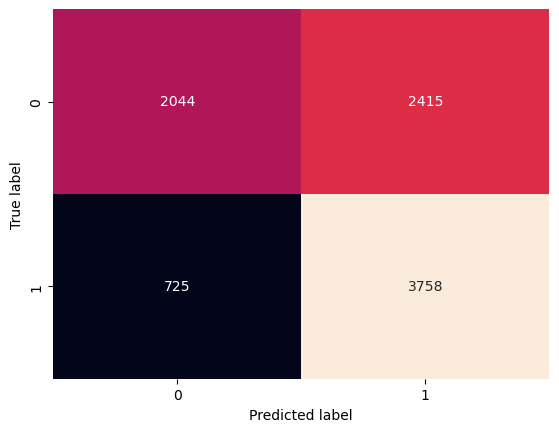

In [66]:
# Compute values for confusion matrix
cm = metrics.confusion_matrix(y_test_final, y_pred)
# Create display of confusion matrix
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cbar = False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
# Display plot
plt.show()

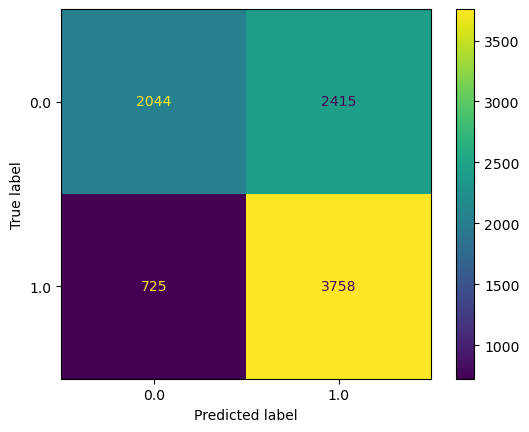

In [67]:
# Create display of confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot confusion matrix
cm_display.plot()
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [68]:
# Create a classification report
target_name=['not verified', 'verified']
print(metrics.classification_report(y_test_final, y_pred, target_names=target_name ))

              precision    recall  f1-score   support

not verified       0.74      0.46      0.57      4459
    verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.64      8942
weighted avg       0.67      0.65      0.64      8942



In [69]:
precision_score = 3758 /(3758+2415)
print(precision_score)
print(metrics.precision_score(y_test_final, y_pred))

0.6087801717155354
0.6087801717155354


In [70]:
recall_score = 3758 /(3758+725)
print(recall_score)
print(metrics.recall_score(y_test_final,y_pred))

0.8382779388802142
0.8382779388802142


In [71]:
accuracy_score = (3758+2044)/(2415+725+3758+2044)
print(accuracy_score)
print(metrics.accuracy_score(y_test_final, y_pred))

0.6488481324088571
0.6488481324088571


* Precison score is the ability of classifier not to label as positive when it is negative. Our precision score is 0.61
* Recall score is the ability of classifier to label as positive when it is positive. Our precison score is 0.84
* Accuracy score is 0.65

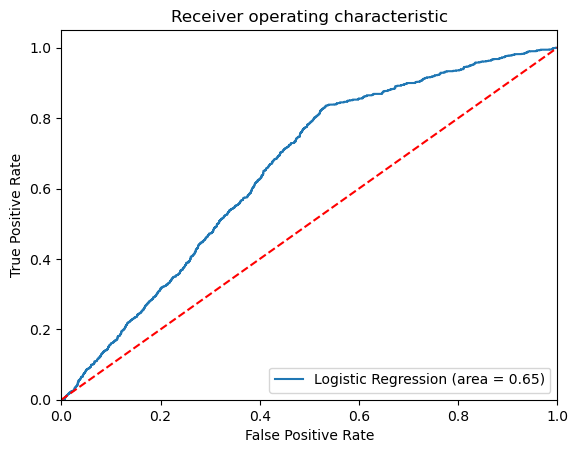

In [72]:
logreg_auc = metrics.roc_auc_score(y_test_final, y_pred)
fpr, tpr, threshold = metrics.roc_curve(y_test_final, logreg.predict_proba(X_test_final)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### **Task 4c. Interpret model coefficients**

In [80]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
coefficients = pd.DataFrame(data =  {'feature_name': model.feature_names_in_, 'Model_coeeficient': model.coef_[0]})

In [81]:
coefficients

,feature_name,Model_coeeficient
0,video_duration_sec,8.607893e-03
1,video_view_count,-2.132079e-06
2,video_share_count,5.930971e-06
3,video_download_count,-1.099775e-05
4,video_comment_count,-6.404235e-04
5,claim_status_opinion,3.908384e-04
6,author_ban_status_banned,-1.781741e-05
7,author_ban_status_under review,-9.682447e-07


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 